In [4]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [5]:
dm=pd.read_csv('Mall_Customers.csv')

In [3]:
dm.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dm.shape

(200, 5)

In [5]:
dm.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
dm.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
dm.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
print("Genre: ",(dm['Genre'] == 0).sum())
print("Age: ",(dm['Age'] == 0).sum())
print("Spending Score: ",(dm['Annual Income (k$)'] == 0).sum())
print("Annual Income: ",(dm['Spending Score (1-100)'] == 0).sum())

Genre:  0
Age:  0
Spending Score:  0
Annual Income:  0


In [9]:
dm.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Female    112
Male       88
Name: Genre, dtype: int64

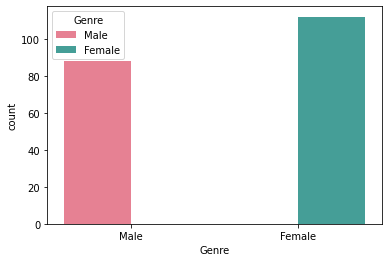

In [11]:
sns.countplot(x = 'Genre', data = dm, palette="husl", hue = "Genre")
dm["Genre"].value_counts()

# Visualizing male and female customer spending scores.

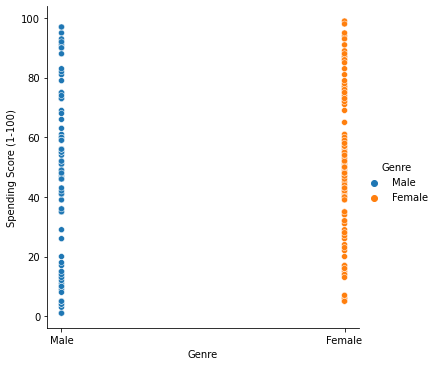

In [12]:
sns.relplot(y='Spending Score (1-100)',x='Genre',hue='Genre',data=dm)

<AxesSubplot:xlabel='Genre', ylabel='Spending Score (1-100)'>

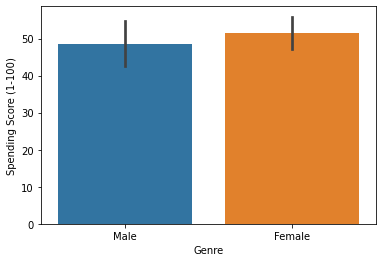

In [13]:
sns.barplot(x="Genre", y="Spending Score (1-100)", data=dm)

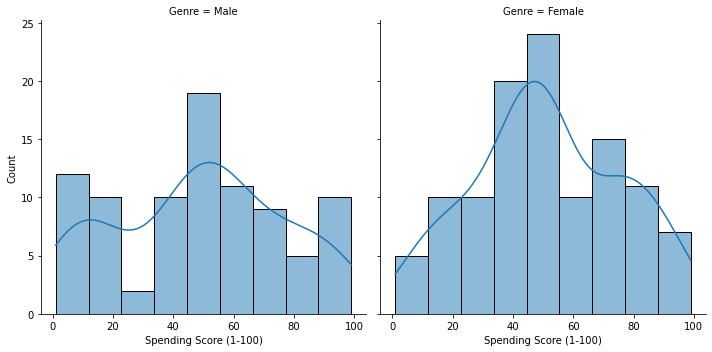

In [14]:
sns.displot(data=dm, x="Spending Score (1-100)", col="Genre", kde=True)

# Identifying similar group customers based on the attributes mentioned in the dataset. 

In [16]:
print("Categorical Columns")
for col_name in dm.columns:
    if dm[col_name].dtypes == 'object' :
        unique_cat = len(dm[col_name].unique())
        print("{col_name} {unique_cat} ".format(col_name=col_name, unique_cat=unique_cat))

Categorical Columns
Genre 2 


In [17]:
d1 = pd.get_dummies(dm['Genre'])
e= pd.concat([dm,d1],axis='columns')
e.shape

(200, 7)

In [18]:
e1= e.drop(["Genre"],axis='columns')
e1.shape

(200, 6)

In [19]:
dm=e1

In [20]:
dm.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0


In [21]:
data_id = dm[['CustomerID','Female','Male']].copy()
data_predictor = dm.drop(['CustomerID', 'Female','Male'], axis=1)

In [22]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
 
for num_clusters in range(2,10):
   kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=50)
   kmeans.fit(data_predictor)
   cluster_labels = kmeans.labels_
  
   silhoutte_avg = silhouette_score(data_predictor, cluster_labels)
   print("For n_clusters={0} the silhouette score={1}".format(num_clusters, silhoutte_avg))

For n_clusters=2 the silhouette score=0.293166070535953
For n_clusters=3 the silhouette score=0.3839349967742105
For n_clusters=4 the silhouette score=0.40546302077733304
For n_clusters=5 the silhouette score=0.44045315045641703
For n_clusters=6 the silhouette score=0.4523443947724053
For n_clusters=7 the silhouette score=0.4397701124821705
For n_clusters=8 the silhouette score=0.42631940650028766
For n_clusters=9 the silhouette score=0.41197801912451715


Text(0, 0.5, 'Inertia')

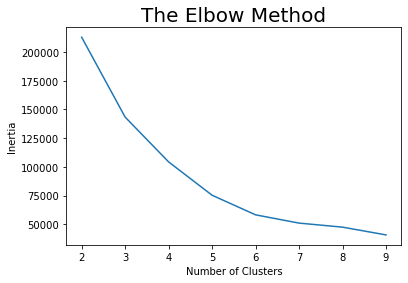

In [23]:
ssd = []
for k in range(2,10):
   kmeans = KMeans(n_clusters = k).fit(data_predictor)
   ssd.append([k, kmeans.inertia_])
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')

In [24]:
kmeans = KMeans(n_clusters=5, max_iter=50, random_state=50)
kmeans.fit(data_predictor)

KMeans(max_iter=50, n_clusters=5, random_state=50)

In [25]:
kmeans.labels_

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1])

In [26]:
data_kmeans = data_predictor.copy()

In [27]:
data_kmeans['ClusterID'] = kmeans.labels_
data_kmeans.head()

,Age,Annual Income (k$),Spending Score (1-100),ClusterID
0,19,15,39,4
1,21,15,81,2
2,20,16,6,4
3,23,16,77,2
4,31,17,40,4


In [28]:
data_kmeans['ClusterID'].value_counts()

0    77
1    39
3    36
2    25
4    23
Name: ClusterID, dtype: int64

In [29]:
data_kmeans = pd.concat([data_id, data_kmeans], axis=1)
data_kmeans.head()

,CustomerID,Female,Male,Age,Annual Income (k$),Spending Score (1-100),ClusterID
0,1,0,1,19,15,39,4
1,2,0,1,21,15,81,2
2,3,1,0,20,16,6,4
3,4,1,0,23,16,77,2
4,5,1,0,31,17,40,4


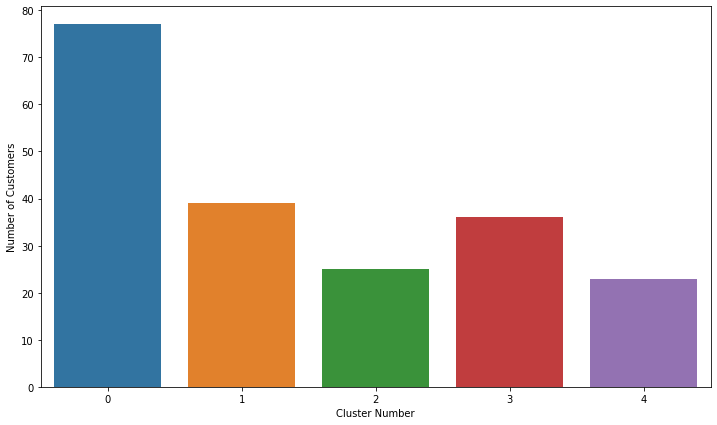

In [30]:
plt.figure(figsize=(12,7))
axis = sns.barplot(x=np.arange(0,5,1),y=data_kmeans.groupby(['ClusterID']).count()['CustomerID'].values)
x=axis.set_xlabel("Cluster Number")
x=axis.set_ylabel("Number of Customers")

In [31]:
data_clustered = pd.merge(dm, data_kmeans[['CustomerID','ClusterID']], on='CustomerID')
data_clustered.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Female,Male,ClusterID
0,1,19,15,39,0,1,4
1,2,21,15,81,0,1,2
2,3,20,16,6,1,0,4
3,4,23,16,77,1,0,2
4,5,31,17,40,1,0,4


In [32]:
d1=data_clustered[['Female','Male','ClusterID']].groupby('ClusterID').sum()
d2=data_clustered[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'ClusterID']].groupby('ClusterID').mean()


In [33]:
d1

,Female,Male
ClusterID,,
0,46,31
1,21,18
2,14,11
3,17,19
4,14,9


In [34]:
d2

,Age,Annual Income (k$),Spending Score (1-100)
ClusterID,,,
0,43.727273,55.480519,49.324675
1,32.692308,86.538462,82.128205
2,24.960000,28.040000,77.000000
3,40.666667,87.750000,17.583333
4,45.217391,26.304348,20.913043


In [35]:

data_clustered = pd.concat([d1, d2], axis=1)
data_clustered

,Female,Male,Age,Annual Income (k$),Spending Score (1-100)
ClusterID,,,,,
0,46,31,43.727273,55.480519,49.324675
1,21,18,32.692308,86.538462,82.128205
2,14,11,24.960000,28.040000,77.000000
3,17,19,40.666667,87.750000,17.583333
4,14,9,45.217391,26.304348,20.913043


<AxesSubplot:xlabel='ClusterID'>

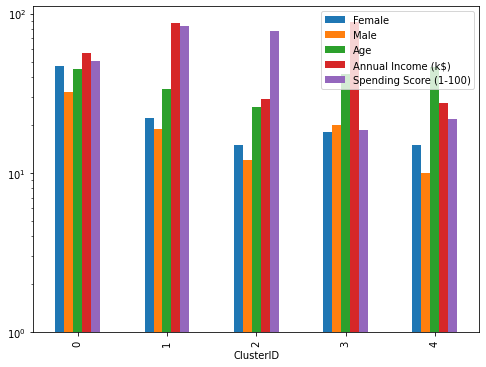

In [36]:
data_clustered.plot(kind='bar',log=True,figsize = (8,6))